In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"E:\ML projects\LoanPredictionBasedOnCustomerBehavior\notebooks\data\Training Data.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df.shape

(252000, 13)

In [5]:
df.drop(columns=['Id'],inplace=True)

In [6]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
X = df.drop(columns=['Risk_Flag'])
Y = df['Risk_Flag']

## EDA

In [8]:
## Univariate Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


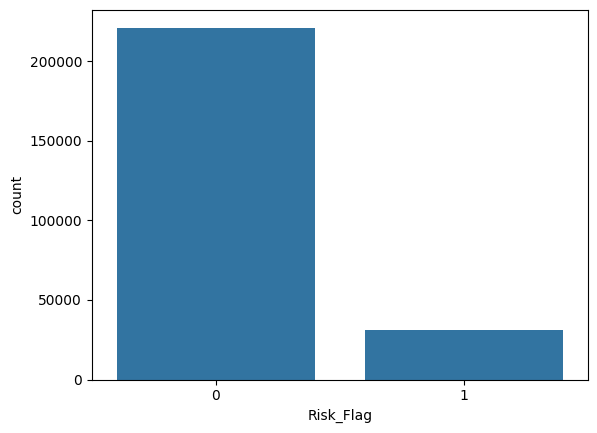

In [10]:
df.groupby('Risk_Flag').size()
sns.countplot(x='Risk_Flag', data=df)
##DATA is imbalanced
plt.show()


Text(0.5, 1.0, 'Age Distribution')

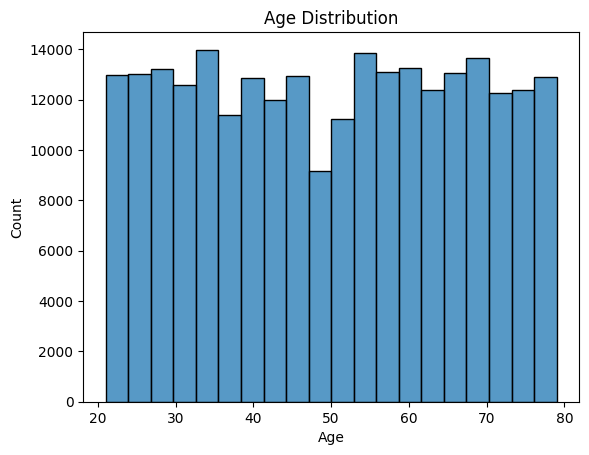

In [11]:
sns.histplot(x='Age', data=df, bins=20)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Income Distribution')

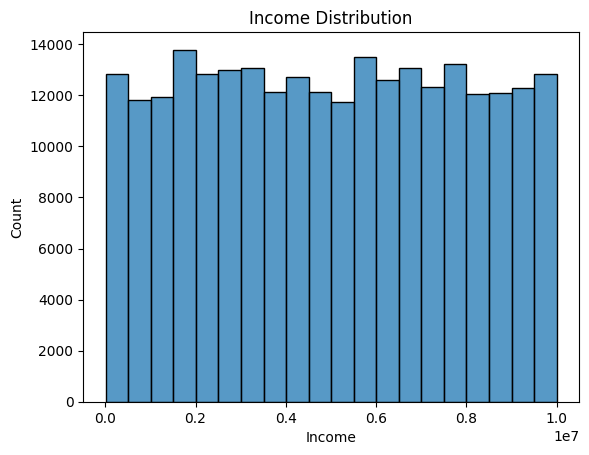

In [12]:
sns.histplot(x='Income', data=df, bins=20)
plt.title('Income Distribution')

C:\Users\SHEKHAR SUMAN\AppData\Local\Temp\ipykernel_1320\3537994505.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette="crest")
C:\Users\SHEKHAR SUMAN\AppData\Local\Temp\ipykernel_1320\3537994505.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette="crest")
C:\Users\SHEKHAR SUMAN\AppData\Local\Temp\ipykernel_1320\3537994505.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette="crest")


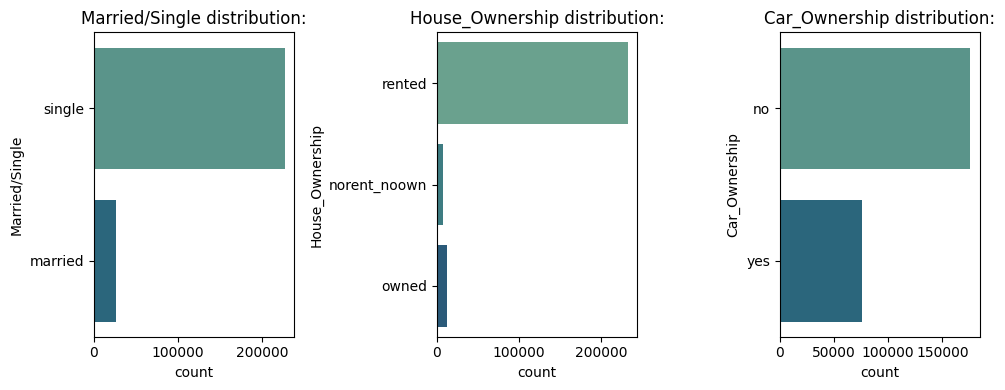

In [13]:
features = ['Married/Single', 'House_Ownership','Car_Ownership']
# for col in df.columns:
#     if df[col].dtype == 'object':
#         features.append(col)
# features
plt.figure(figsize=(10,4))
for i,col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.countplot(df[col],palette="crest")
    plt.title(f'{col} distribution:')
plt.tight_layout()
plt.show()

In [14]:
## Single are more likely to take loans,rented houses are more to take loans and people having cars are less likely to take loans

In [15]:
P = df.groupby('Profession').size()/df.shape[0]*100
P = pd.DataFrame(P).sort_values(by=0, ascending=False)
P[:5]
# These 5 Profession are more likely to take loan

,0
Profession,
Physician,2.363889
Statistician,2.303968
Web_designer,2.141667
Psychologist,2.138889
Computer_hardware_engineer,2.131746


In [16]:
P = df.groupby('CITY').size()/df.shape[0]*100
P = pd.DataFrame(P).sort_values(by=0, ascending=False)
P[:5]

,0
CITY,
Vijayanagaram,0.499603
Bhopal,0.479365
Bulandshahr,0.470238
Saharsa[29],0.468254
Vijayawada,0.465079


In [17]:
P = df.groupby('STATE').size()/df.shape[0]*100
P = pd.DataFrame(P).sort_values(by=0, ascending=False)
P[:5]

,0
STATE,
Uttar_Pradesh,11.269841
Maharashtra,10.143651
Andhra_Pradesh,10.038492
West_Bengal,9.318651
Bihar,7.849206


C:\Users\SHEKHAR SUMAN\AppData\Local\Temp\ipykernel_1320\626547669.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],palette="crest")
C:\Users\SHEKHAR SUMAN\AppData\Local\Temp\ipykernel_1320\626547669.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],palette="crest")


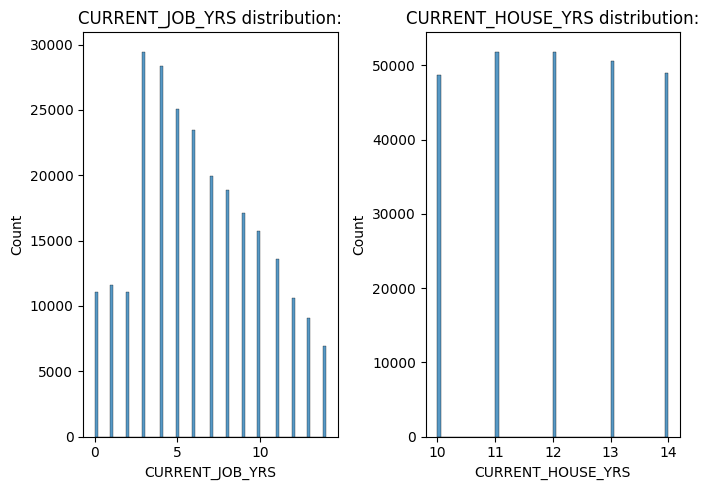

In [18]:
features = ['CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
plt.figure(figsize=(7,5))
for i, col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.histplot(df[col],palette="crest")
    plt.title(f'{col} distribution:')
plt.tight_layout()
plt.show()

In [19]:
## Bivariate Analysis

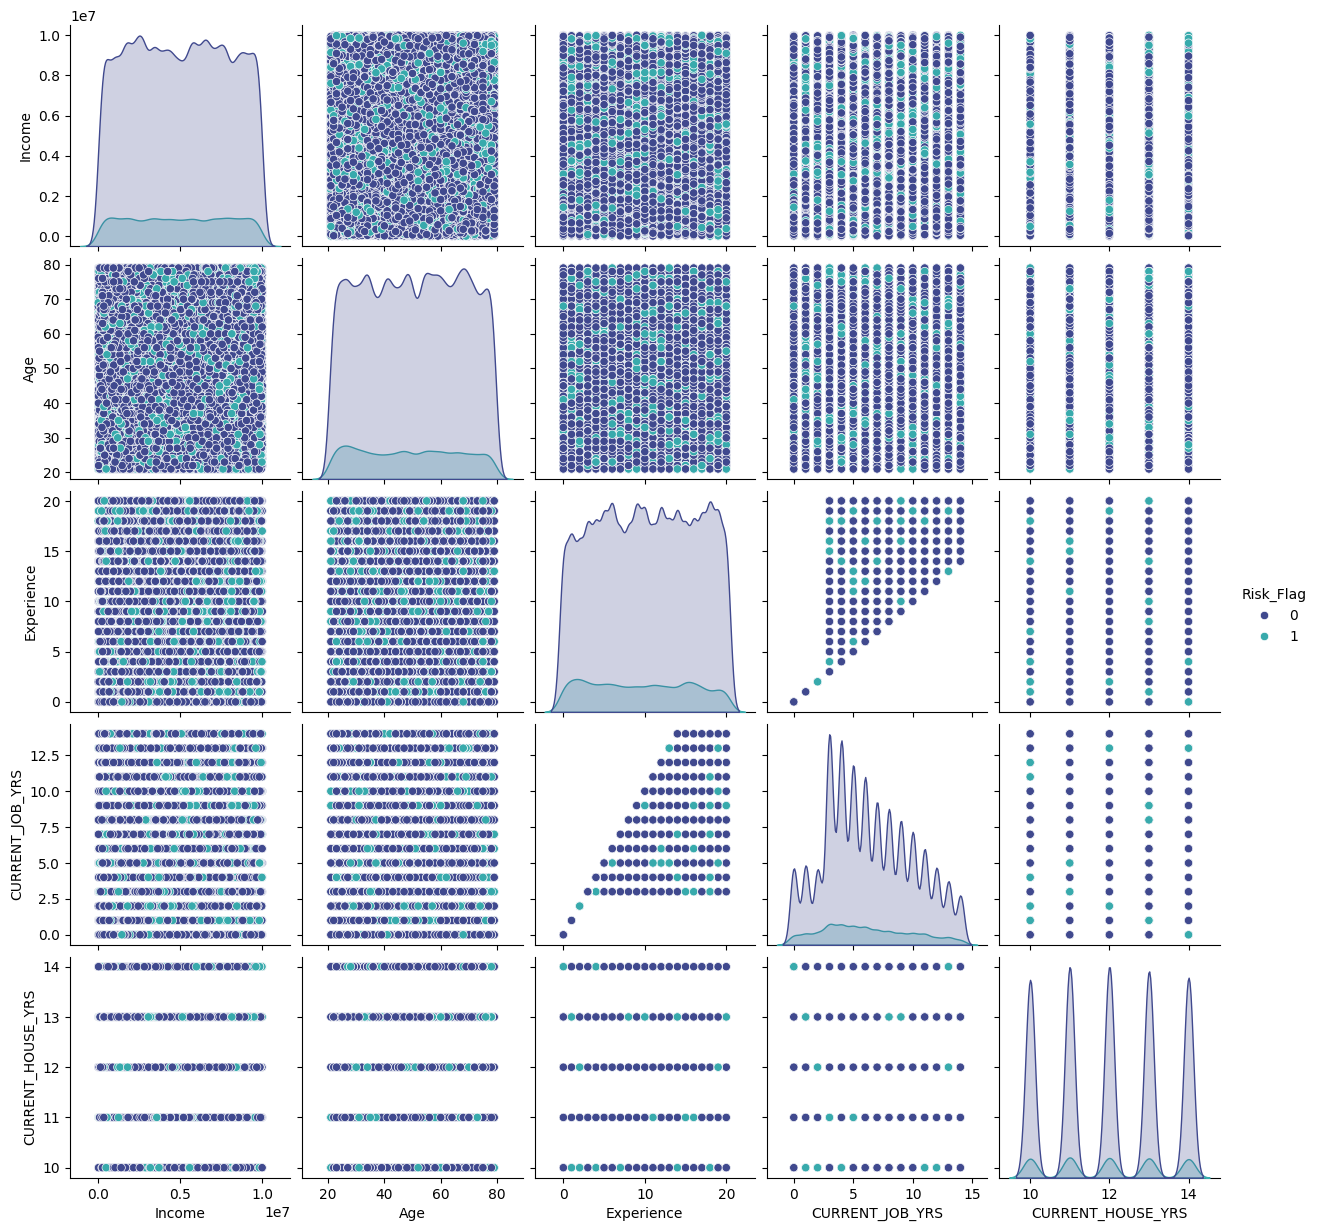

In [20]:
sns.pairplot(df, hue='Risk_Flag', diag_kind='kde', palette='mako')
plt.show()

Text(0.5, 1.0, 'Profession vs Risk_Flag')

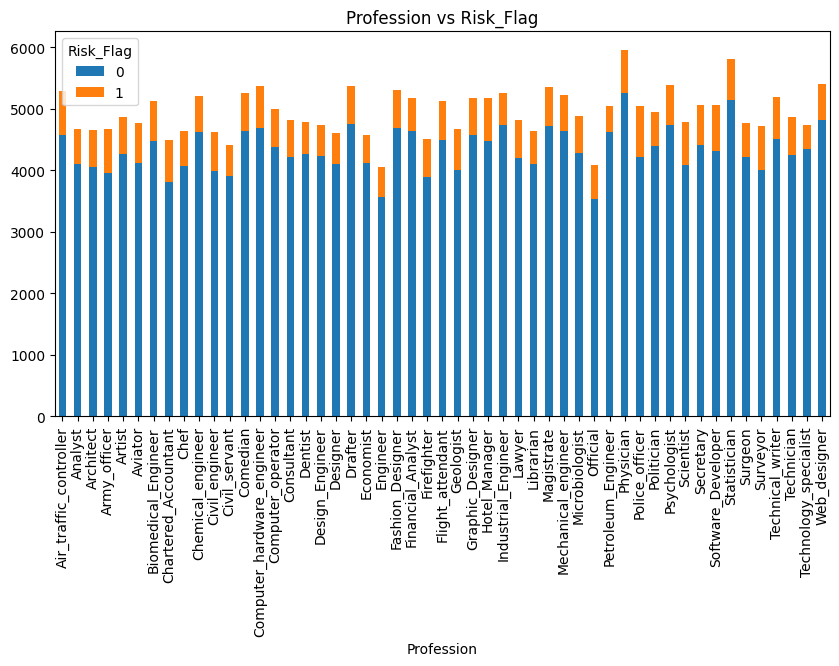

In [21]:
df.groupby(["Profession","Risk_Flag"]).size().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Profession vs Risk_Flag')

In [22]:
data = df.groupby(["Profession","Risk_Flag"]).size().reset_index(name='Count')
data
    

,Profession,Risk_Flag,Count
0,Air_traffic_controller,0,4566
1,Air_traffic_controller,1,715
2,Analyst,0,4101
3,Analyst,1,567
4,Architect,0,4046
...,...,...,...
97,Technician,1,624
98,Technology_specialist,0,4351
99,Technology_specialist,1,386
100,Web_designer,0,4808


In [23]:
df1 = pd.DataFrame(data)
# Filter where Risk_Flag == 1
high_risk_df = df1[df1["Risk_Flag"] == 1]
# Get top 5 professions with highest Risk_Flag 1 count
top_5_high_risk = high_risk_df.nlargest(5, "Count")

print(top_5_high_risk)

                Profession  Risk_Flag  Count
77          Police_officer          1    826
87      Software_Developer          1    750
1   Air_traffic_controller          1    715
93                Surveyor          1    714
75               Physician          1    710


C:\Users\SHEKHAR SUMAN\AppData\Local\Temp\ipykernel_1320\2949530344.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=top_5_high_risk['Profession'], y=top_5_high_risk['Count'], palette="mako")


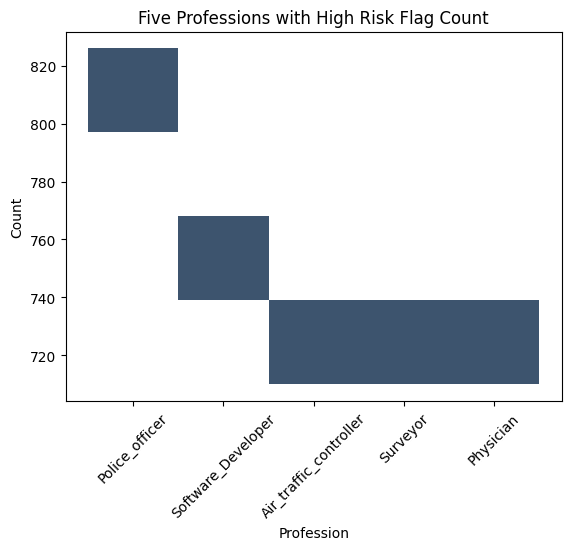

In [24]:
sns.histplot(x=top_5_high_risk['Profession'], y=top_5_high_risk['Count'], palette="mako")
plt.title('Five Professions with High Risk Flag Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
data = df.groupby('Married/Single')["Risk_Flag"].value_counts().unstack(fill_value=0)

In [31]:
# Creating the DataFrame
data1 = {
    "Married/Single": ["married", "single"],
    "Risk_0": [23092, 197912],
    "Risk_1": [2636, 28360]
}

df2 = pd.DataFrame(data1)

# Display DataFrame
print(df2)

  Married/Single  Risk_0  Risk_1
0        married   23092    2636
1         single  197912   28360


(-1.0999999705037837,
 1.099999773443627,
 -1.0999998774030377,
 1.0999999941620495)

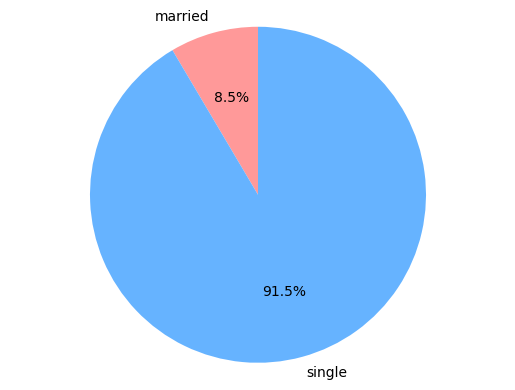

In [32]:
plt.pie(df2['Risk_1'], labels=df2['Married/Single'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
## Single people are more likely to have loan Approval

In [29]:
df.groupby('Car_Ownership')["Risk_Flag"].value_counts().unstack(fill_value=0)

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


  Car_Ownership  Risk_0  Risk_1
0            no  153439   67565
1           yes   22561    8435


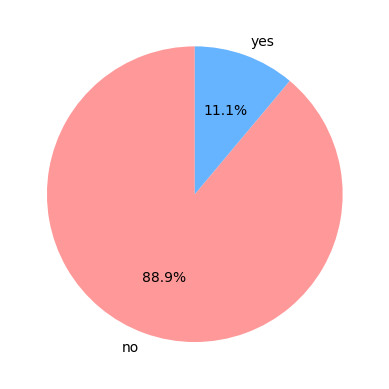

In [30]:
# Creating the DataFrame
data2 = {
    "Car_Ownership": ["no", "yes"],
    "Risk_0": [153439,22561],
    "Risk_1": [67565,8435]
}

df3 = pd.DataFrame(data2)

# Display DataFrame
print(df3)
plt.pie(df3['Risk_1'], labels=df3['Car_Ownership'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.show()